# Artificial Neural Network (ANN) Model

In [280]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# นำเข้าข้อมูล

In [281]:
# โหลดข้อมูลจากไฟล์ CSV
data = pd.read_csv('DataComsci.csv')  # อ่านข้อมูลจากไฟล์ CSV

# ดูตัวอย่างข้อมูล
print(data.describe())

print(data.columns.tolist())

data

       GRADUATEYEAR     STUDENTID  GPA_graduate
count    343.000000  3.430000e+02    343.000000
mean    2564.303207  1.002616e+08      2.610554
std        1.389672  1.621539e+04      0.413158
min     2562.000000  1.002056e+08      2.000000
25%     2563.000000  1.002492e+08      2.310000
50%     2564.000000  1.002611e+08      2.540000
75%     2566.000000  1.002712e+08      2.815000
max     2566.000000  1.002872e+08      3.970000
['GRADUATEYEAR', 'STUDENTID', 'ASEAN Folklore', 'Algorithm Design and Analysis', 'Artificial  Intelligence', 'Arts in Daily Life', 'Calculus for Science', 'Civilization and Local Wisdom', 'Cloud Computing', 'Communicative English for Academic Analysis in Computer Technology', 'Communicative English for Research Presentation in Computer Technology', 'Communicative English for Specific Purposes in Computer Technology', 'Computer Architecture', 'Computer Graphics and Animation', 'Computer Network and Data Communication', 'Consumption in Daily-life', 'Data Mining Te

,GRADUATEYEAR,STUDENTID,ASEAN Folklore,Algorithm Design and Analysis,Artificial Intelligence,Arts in Daily Life,Calculus for Science,Civilization and Local Wisdom,Cloud Computing,Communicative English for Academic Analysis in Computer Technology,...,Thai Language for Academic Communication,Thai Language for Communication in the 21st Century,Thai State and the World Community,The King''s Philosophy for Living,Ways of Living in the Digital Age,Web Technology,Western Music in Daily Life,World Mythology,XML and Web Services,GPA_graduate
0,2562,100205568,B+,D+,D+,NaN,D+,NaN,NaN,B+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.10
1,2562,100205606,NaN,C,C+,NaN,D,NaN,NaN,B+,...,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,2.00
2,2564,100215265,NaN,D,F,NaN,F,NaN,NaN,A,...,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,2.01
3,2562,100225543,NaN,C,D,NaN,F,B+,NaN,D,...,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,2.10
4,2565,100225544,NaN,D+,D,NaN,F,NaN,NaN,D+,...,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2566,100282344,NaN,D+,C+,NaN,D,A,NaN,C,...,NaN,NaN,NaN,NaN,C+,NaN,NaN,NaN,NaN,2.34
339,2566,100282356,NaN,C+,A,NaN,C+,A,NaN,C,...,B,NaN,NaN,NaN,C+,NaN,NaN,NaN,NaN,3.19
340,2566,100282359,NaN,D+,D,NaN,C,NaN,NaN,B,...,NaN,C+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.68
341,2566,100282360,NaN,C+,D+,NaN,D,NaN,NaN,B,...,B,NaN,NaN,NaN,C+,NaN,NaN,NaN,NaN,2.52


# ขั้นตอนที่ 1: เตรียมข้อมูล

In [282]:
# แปลงเกรดเป็นค่าตัวเลข
grade_mapping = {'A': 4.0, 'B+': 3.5, 'B': 3.0, 'C+': 2.5, 'C': 2.0, 'D+': 1.5, 'D': 1.0, 'F': 0.0}
data.replace(grade_mapping, inplace=True)

# แทนค่าที่หายไปด้วยค่าเฉลี่ยของแต่ละคอลัมน์สำหรับคอลัมน์ตัวเลข
data.fillna(data.mean(numeric_only=True), inplace=True)

# เลือกฟีเจอร์ที่เกี่ยวข้อง (รายวิชาที่จะใช้ทำนาย GPA)
features = ['ASEAN Folklore', 'Algorithm Design and Analysis', 'Artificial  Intelligence', 'Arts in Daily Life', 'Calculus for Science', 
            'Civilization and Local Wisdom', 'Cloud Computing', 'Communicative English for Academic Analysis in Computer Technology', 
            'Communicative English for Research Presentation in Computer Technology', 
            'Communicative English for Specific Purposes in Computer Technology', 'Computer Architecture', 'Computer Graphics and Animation', 
            'Computer Network and Data Communication', 'Consumption in Daily-life', 'Data Mining Techniques', 'Data Science', 'Data Structure', 
            'Data Warehousing and Applications', 'Database Systems', 'Developmental English', 'Digital Image Processing', 'Digital Marketing', 
            'Discrete Mathematics for Computer Science', 'Electronic Commerce', 'Energy and Technology Around Us', 
            'English Critical Reading for Effective Communication', 'English Listening and Speaking for Communication', 
            'English Writing for Effective Communication', 'Follklore and Beauty', 'Food and Life Style', 'Functional Programming', 
            'Fundamental English', 'Fundamental Laws for Quality of Life', 'Fundamentals of Programming', 'General Chemistry', 'General Physics', 
            'Group Dynamics and Teamwork', 'Happiness with Hobbies', 'Health Sociology', 'History and Development of Computer Technology', 
            'Human Behavior', 'Information Science for Study and Research', 'Internet Geographic Information Systems', 'Internet Programming', 
            'Introduction to Computer Information Science', 'Introduction to Data Management in Digital Era', 'Introduction to Geoinformatics', 
            'Introduction to Robotics', 'Introductory Biology', 'Introductory Chemistry', 'Introductory Mathematics', 'Introductory Physics', 
            'Language, Society and Culture', 'Leadership and Compassion', 'Life Privacy', 'Life Skills', 'Life and Health', 
            'Linear Algebra and Applications', 'Living Management', 'Local Folklore', 'Man and Environment', 
            'Mathematics and Statistics in Everyday Life', 'Mathematics for Science', 'Media Literacy', 'Meditation for Life Development', 
            'Mobile Application Development', 'Multimedia Application Development', 'Multimedia and Web Technology', 'Music Studies in Thai Culture', 
            'Naresuan Studies', 'Network Security', 'Numerical Methods', 'Object Oriented Programming', 'Object-Oriented Analysis and Design', 
            'Operating Systems', 'Philosophy of Life for Sufficient Living', 'Philosophy of Science', 'Politics, Economy and Society', 
            'Population and Reproductive Health', 'Printmaking', 'Production Management', 'Programming Languages', 'Python Programming', 
            'Reading in the Digital Age Century', 'Recreation in School and Community', 'Religions and Ethics for Social Development', 
            'Science in Everyday Life', 'Seminar ', 'Sensing and Actuation for Internet of Things', 'Social Innovation', 
            'Social Innovation for Creative Development', 'Social Problems and Current Development Issue', 
            'Social Problems and Current Development Issues', 'Software Engineering', 'Special Topics in Computer Science', 
            'Statistical Analysis', 'System Analysis and Design', 'Thai Customs and Religions in Thailand', 'Thai Language Skills', 
            'Thai Language for Academic Communication', 'Thai Language for Communication in the 21st Century', 'Thai State and the World Community', 
            "The King''s Philosophy for Living", 'Ways of Living in the Digital Age', 'Web Technology', 'Western Music in Daily Life', 
            'World Mythology', 'XML and Web Services']  # แทนที่ด้วยรายชื่อฟีเจอร์ที่คุณต้องการ

X = data[features]  # สร้าง DataFrame สำหรับฟีเจอร์

# แปลงฟีเจอร์ที่เป็นประเภทข้อความ (categorical) ถ้ามี
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    # ลบค่า NaN และตรวจสอบให้แน่ใจว่าคอลัมน์มีประเภทข้อมูลเป็นข้อความอย่างเดียว
    if X[col].isnull().all():  # ตรวจสอบว่าคอลัมน์เป็น NaN ทั้งหมด
        continue
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))  # แปลงเป็นสตริงเพื่อหลีกเลี่ยงประเภทข้อมูลผสม
        label_encoders[col] = le

# ตัวแปรเป้าหมาย (GPA)
y = data['GPA_graduate']

### ตรวจสอบขนาดของ X และ y


In [283]:
print(X.shape)
print(y.shape)

(343, 108)
(343,)


# ขั้นตอนที่ 2: แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ

In [284]:
# แบ่งข้อมูลเป็นชุดฝึก (train) และชุดทดสอบ (test) ในสัดส่วน 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ทำการปรับมาตรฐานข้อมูล (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ขั้นตอนที่ 3: สร้างโมเดล ANN และฝึกสอน

In [285]:
model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(X_train.shape[1],)))  # เลเยอร์แรก
model.add(Dense(15, activation='relu'))  # เลเยอร์ที่สอง
model.add(Dense(1))  # เลเยอร์สุดท้าย (สำหรับการทำนาย)

# คอมไพล์โมเดล
model.compile(optimizer= Adam(learning_rate = 0.075 ), loss='mean_squared_error')

# ดูภาพรวมของโครงสร้างโมเดล
model.summary()

# ฝึกโมเดล
history = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_split=0.2, verbose=1)

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_123 (Dense)               │ (None, 25)             │         2,725 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,131 (12.23 KB)

 Trainable params: 3,131 (12.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.6172 - val_loss: 3.4027
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2495 - val_loss: 1.0959
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8901 - val_loss: 0.5475
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4193 - val_loss: 0.3125
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1930 - val_loss: 0.2069
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0847 - val_loss: 0.1694
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0477 - val_loss: 0.1408
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0381 - val_loss: 0.1460
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0316 - val_loss: 0.1123
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275 - val_loss: 0.1103
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0275 - val_loss: 0.1482
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

# ขั้นตอนที่ 4: ทำนายโดยใช้ชุดทดสอบ

In [286]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


# ขั้นตอนที่ 5: ประเมินผลโมเดล

In [287]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# แสดงผลลัพธ์

In [288]:
print(f'Mean Squared Error (MSE): {mse}')  # ค่าความคลาดเคลื่อนเฉลี่ย
print(f'R-squared (R^2): {r2}')  # ค่าความแม่นยำของโมเดล
print('')

# แสดงค่า weights ของทุกเลเยอร์ในโมเดล ANN
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()  # ดึงค่า weights ของเลเยอร์
    print(f"Layer {i + 1} Weights:")
    print(weights[0])  # ค่า weights
    print("Biases:")
    print(weights[1])  # ค่า biases

Mean Squared Error (MSE): 0.05270886766445211
R-squared (R^2): 0.597781658954318

Layer 1 Weights:
[[-0.4219398  -0.30495498 -0.3862656  ... -0.3388094  -0.3572096
  -0.14748366]
 [-0.37068313 -0.30930042 -0.3484593  ... -0.1991939   0.5999834
  -0.28124872]
 [-0.28253305 -0.02791734  0.0071183  ... -0.37956142  0.15687273
  -0.40001237]
 ...
 [ 0.28852057 -0.0944906   0.21551171 ...  0.36996886  0.29477748
  -0.607912  ]
 [-0.08504097  0.52242875 -0.6211618  ... -0.8380737   0.27053365
   0.05348925]
 [-0.4580569  -0.3841255  -0.4410039  ... -0.7324115   0.07668649
  -0.5704359 ]]
Biases:
[-0.5368863  -0.1975053  -1.0733458  -1.5519572  -0.4303774  -0.4203144
 -0.07670873 -0.21762882 -0.5275356   0.19332913 -0.20352452 -0.81742364
 -0.504536   -0.7692843  -0.7964964  -0.22923344 -0.9672059  -1.0291075
 -0.5938862  -1.8076841   0.8202501  -0.07361631 -0.23057182 -0.11728051
 -0.2871153 ]
Layer 2 Weights:
[[-0.1594858  -0.21273942  0.04156816 -0.22554941 -0.26722842 -0.5335221
  -0.8683

# กราฟแสดงผล

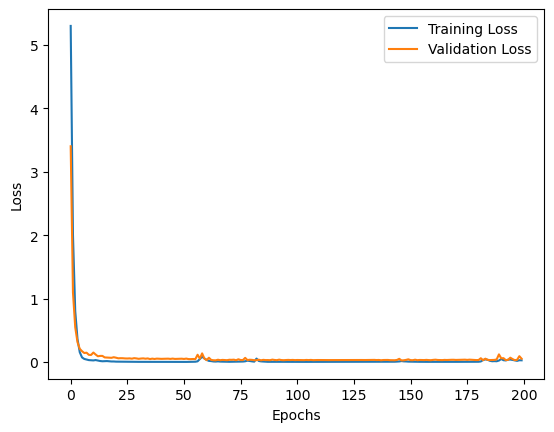

In [289]:
# สร้างกราฟแสดงการฝึกโมเดล
plt.plot(history.history['loss'], label='Training Loss')  # Loss ในชุดฝึก
plt.plot(history.history['val_loss'], label='Validation Loss')  # Loss ในชุดทดสอบ
plt.xlabel('Epochs')  # ชื่อแกน X
plt.ylabel('Loss')  # ชื่อแกน Y
plt.legend()  # เพิ่มคำอธิบายกราฟ
plt.show()  # แสดงกราฟ